In [1]:

!pip install auto_ts

     |████████████████████████████████| 51kB 4.0MB/s 
     |████████████████████████████████| 1.3MB 9.5MB/s 
     |████████████████████████████████| 962kB 20.0MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656558 sha256=3b3475412d4a6d5ec6f9acbfa9335685eb5a8f18b62ac0278623f49a60fabf4f
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT

import pandas as pd
#Below code for graph size
mpl.rcParams['figure.figsize'] = (35, 6)
mpl.rcParams['axes.grid'] = False

In [5]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

df = pd.read_csv('https://raw.githubusercontent.com/virabhra/karnatak_covod_19Dec2020/main/karnatak_covod_19Dec2020.csv', parse_dates = ['Date'],date_parser=parse)

df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             202 non-null    datetime64[ns]
 1   Isolated Case    202 non-null    int64         
 2   Discharged Case  202 non-null    int64         
 3   Positive Case    202 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.4 KB


In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  202
Columns  :  4

Features : 
 ['Date', 'Isolated Case', 'Discharged Case', 'Positive Case']

Missing values :   Date               False
Isolated Case      False
Discharged Case    False
Positive Case      False
dtype: bool

Unique values :  
 Date               202
Isolated Case       72
Discharged Case    136
Positive Case      202
dtype: int64


In [7]:
ec_df = df.set_index('Date')

In [9]:
ec_data = ec_df['Positive Case']
ec_data.head()

Date
2020-06-01    3694
2020-06-02    3993
2020-06-03    4322
2020-06-04    4541
2020-06-05    4969
Name: Positive Case, dtype: int64

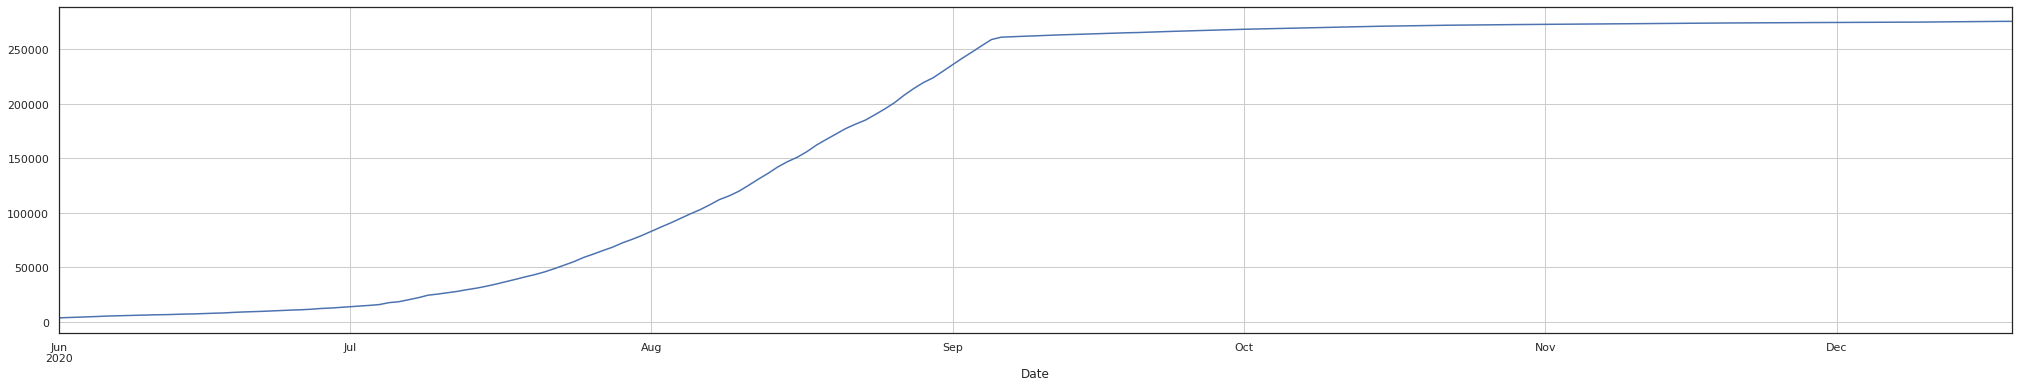

In [16]:
ec_data.plot(grid=True)

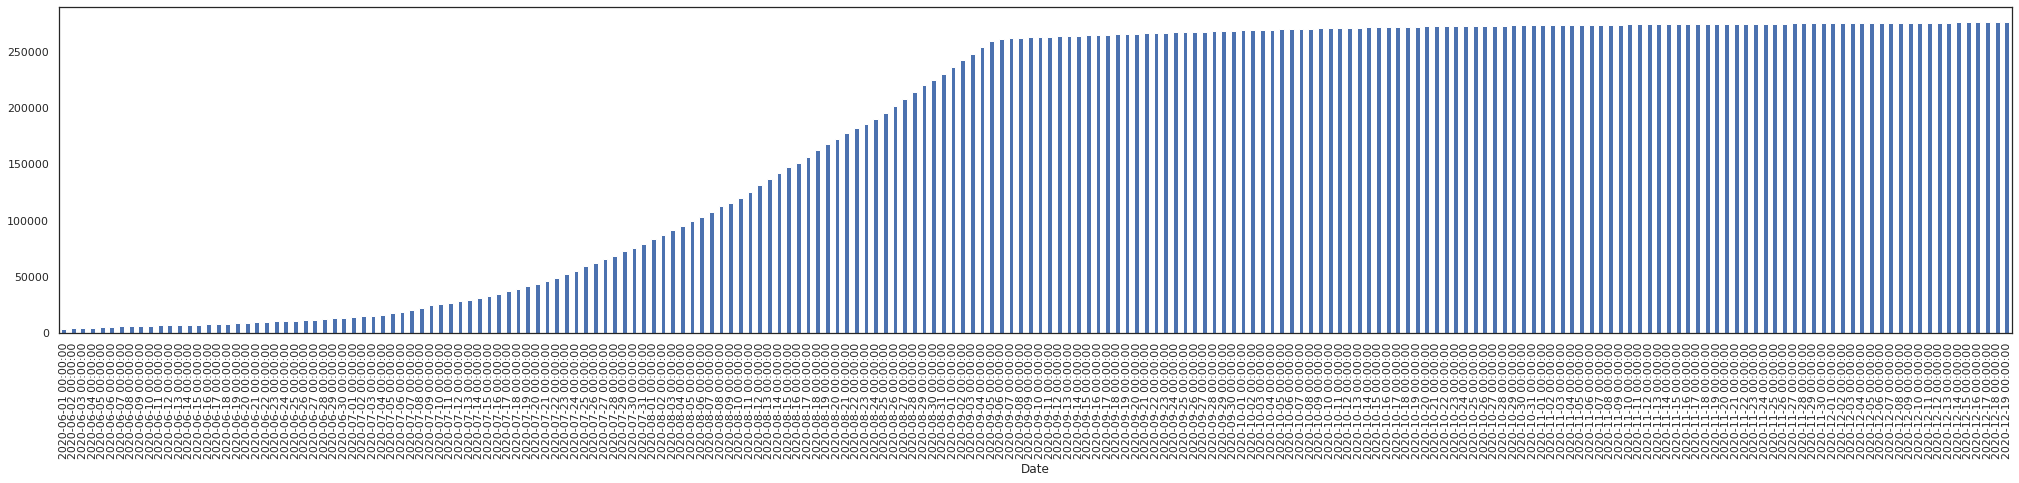

In [14]:

ec_df_2020=ec_df.loc['2020']
ec_data_2020=ec_df_2020['Positive Case']
ec_data_2020.plot.bar()

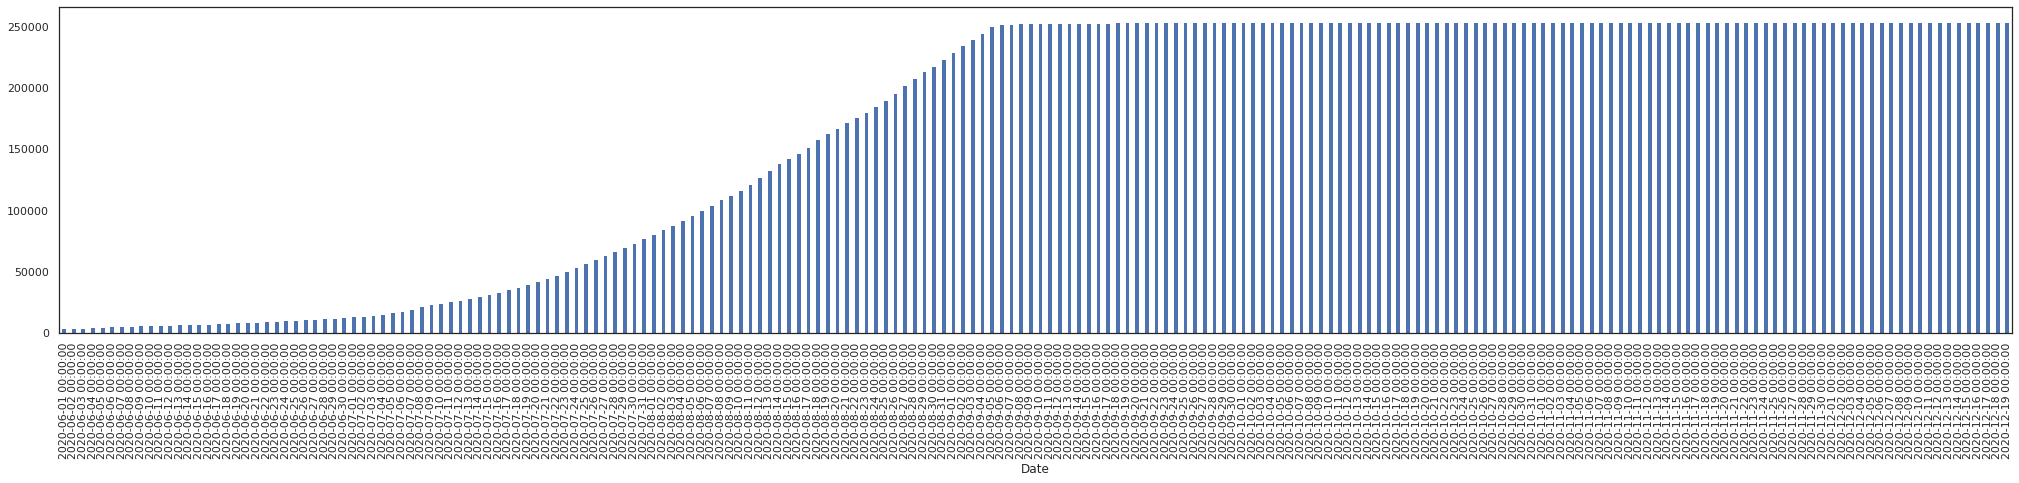

In [15]:

ec_df_2020=ec_df.loc['2020']
ec_data_2020=ec_df_2020['Discharged Case']
ec_data_2020.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb34ba06d30>,
      dtype=object)

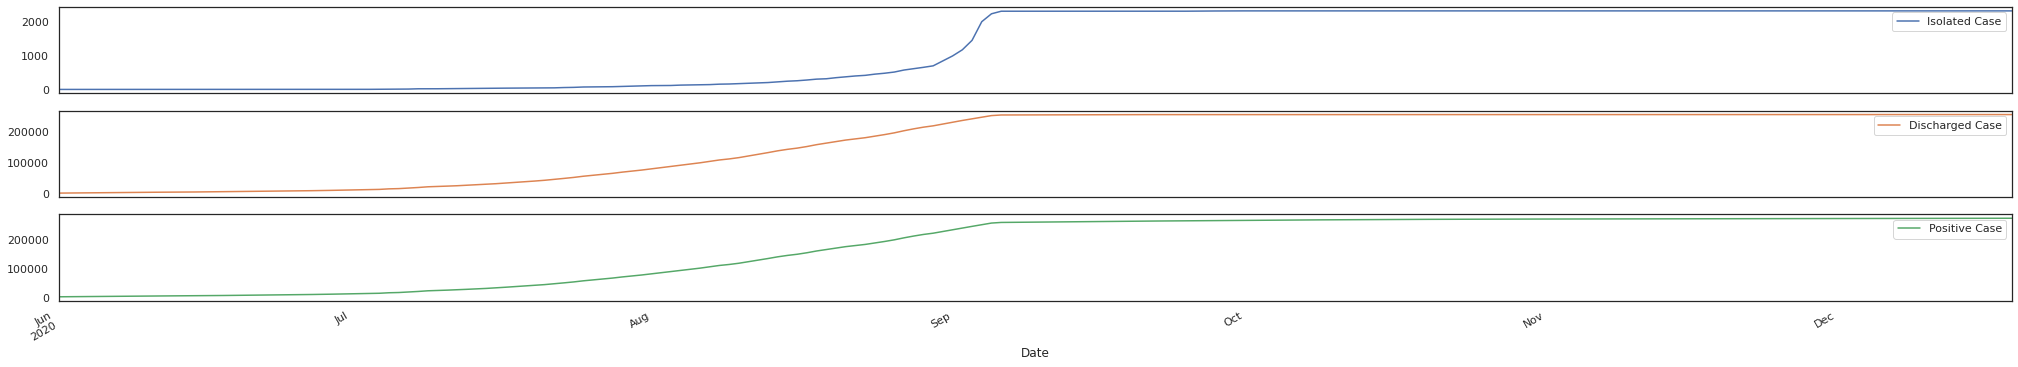

In [17]:
ec_df_2020=ec_df.loc['2020']
ec_data_2020=ec_df_2020[['Isolated Case','Discharged Case','Positive Case']]
ec_data_2020.plot(subplots=True)

In [18]:
final_df = df.copy()

In [19]:
final_df.head(10)

,Date,Isolated Case,Discharged Case,Positive Case
0,2020-06-01,0,3627,3694
1,2020-06-02,0,3925,3993
2,2020-06-03,1,4250,4322
3,2020-06-04,1,4463,4541
4,2020-06-05,1,4890,4969
5,2020-06-06,1,5282,5366
6,2020-06-07,1,5518,5604
7,2020-06-08,1,5807,5900
8,2020-06-09,1,5957,6054
9,2020-06-10,1,6155,6262


In [24]:
train = final_df[:142]
test = final_df[60:]
print(train.shape, test.shape)
print(train.head())
print(test.head())

(142, 4) (142, 4)
        Date  Isolated Case  Discharged Case  Positive Case
0 2020-06-01              0             3627           3694
1 2020-06-02              0             3925           3993
2 2020-06-03              1             4250           4322
3 2020-06-04              1             4463           4541
4 2020-06-05              1             4890           4969
         Date  Isolated Case  Discharged Case  Positive Case
60 2020-07-31            104            76919          79190
61 2020-08-01            113            80763          83151
62 2020-08-02            115            84565          87042
63 2020-08-03            117            88259          90851
64 2020-08-04            128            92277          94973


In [25]:
ts_column = 'Date'
sep = ','
target = 'Positive Case'

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (142, 3)
    Target variable = Positive Case
Time series input in days = 1
it is a Daily time series.

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
             Positive Case  Isolated Case  Discharged Case
Date                                                     
2020-06-01           3694              0             3627
Time Series data: sample row after transformation
           ds     y  Isolated Case  Discharged Case
0 2020-06-01  3694              0             3627
    Fit-Predict data (shape=(142, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 6


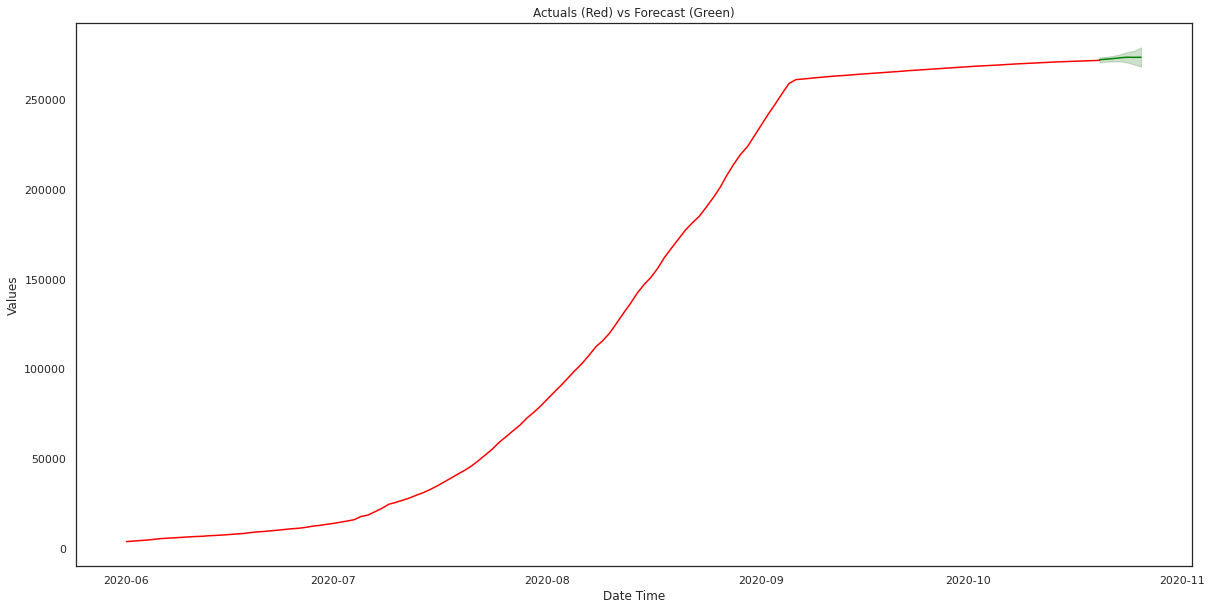

    RMSE = 338.89
    Std Deviation of Originals = 109,858.72
    Normalized RMSE = 0%

Running PyFlux Model...
Data Set split into train (136, 3) and test (6, 3) for Cross Validation Purposes
Cycling through various (p,d,q) parameters
................................
Best Params Selected (based on rmse): (3, 1, 3)


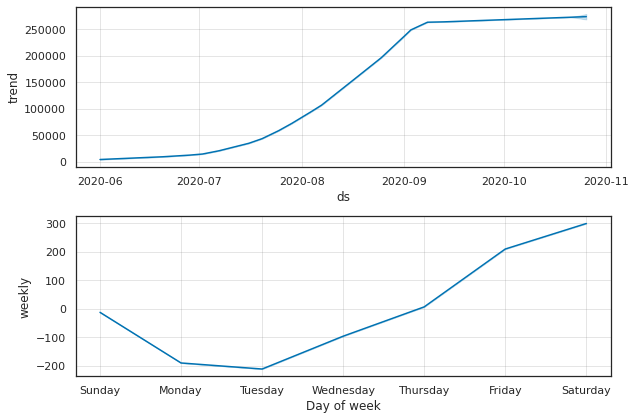

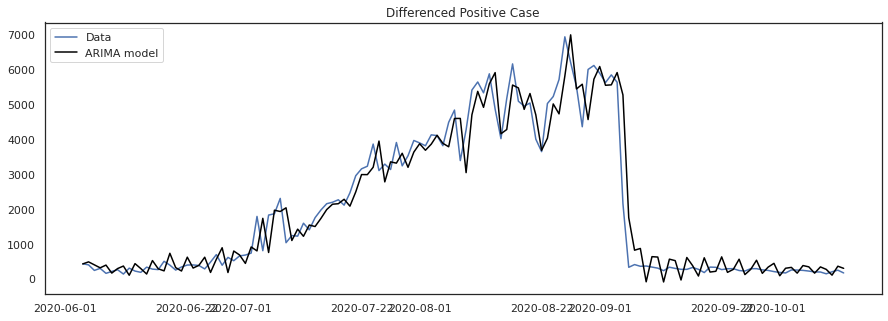

Normal ARIMA(3,1,3)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced Positive Case           Method: MLE                                       
Start Date: 2020-06-04 00:00:00                         Log Likelihood: -1016.2208                        
End Date: 2020-10-14 00:00:00                           AIC: 2048.4416                                    
Number of observations: 132                             BIC: 2071.504                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 163.4524   135.1238   1.2096   0.2264   (-101.3902 | 428.2949)   
AR(1)                                

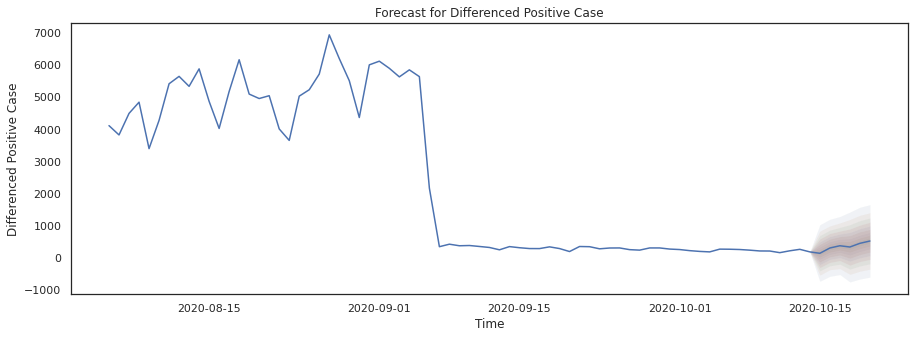

Dynamic 6-period Forecasts:
    RMSE = 192.68
    Std Deviation of Originals = 108,465.39
    Normalized RMSE = 0%

Running Non Seasonal ARIMA Model...
Data Set split into train (136,) and test (6,) for Cross Validation Purposes

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 2, MA order q = 2, Interim metric = 2135.240

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 3, MA order q = 3, Interim metric = 2096.018

Best model is: Non Seasonal ARIMA(3,1,3), aic = 2096.018
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
Dynamic predictions erroring but continuing...

Dynamic 6-period Forecasts:


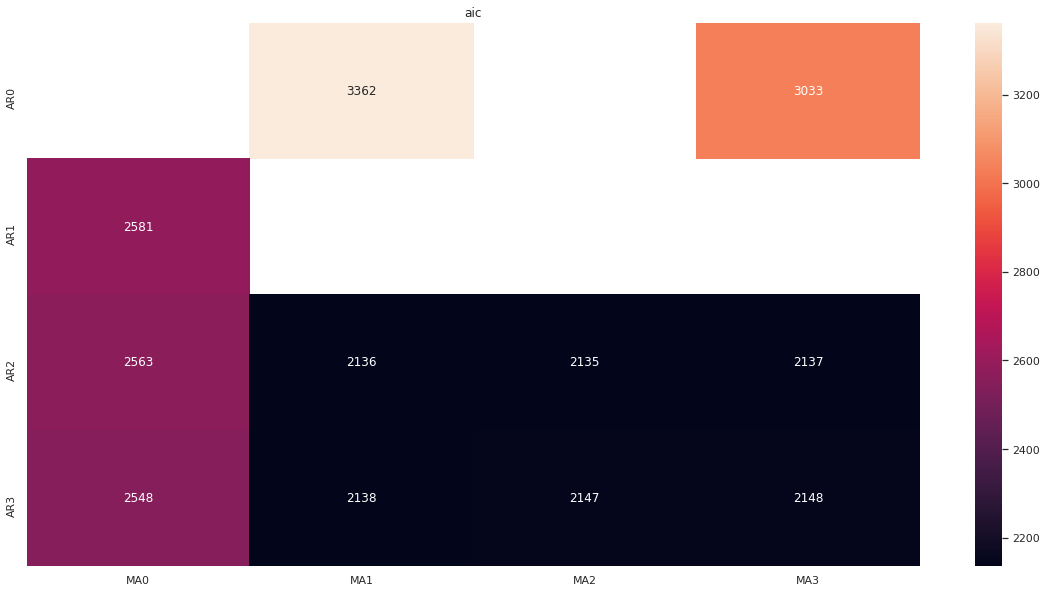

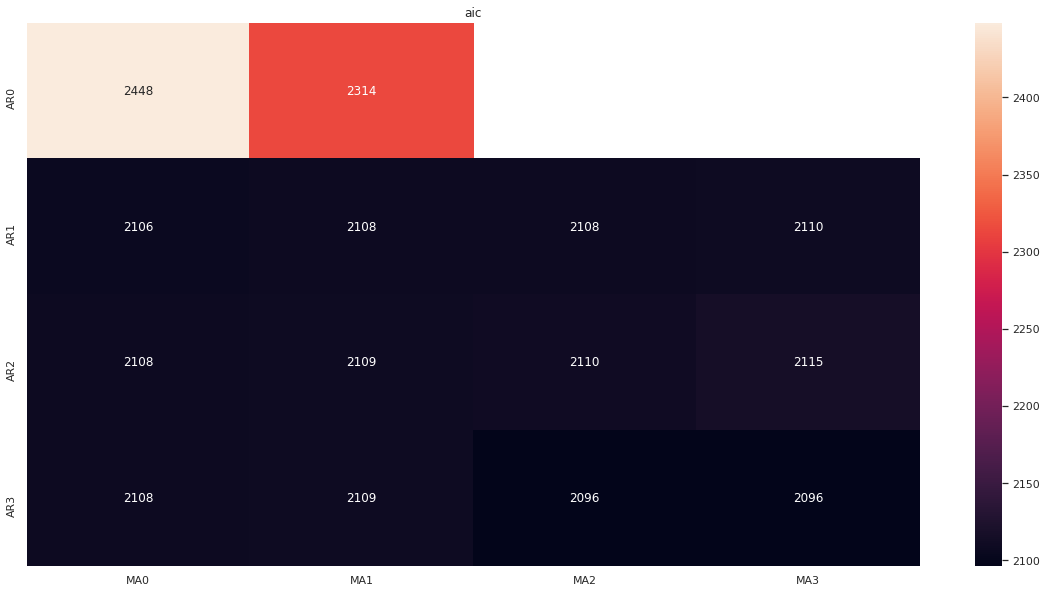

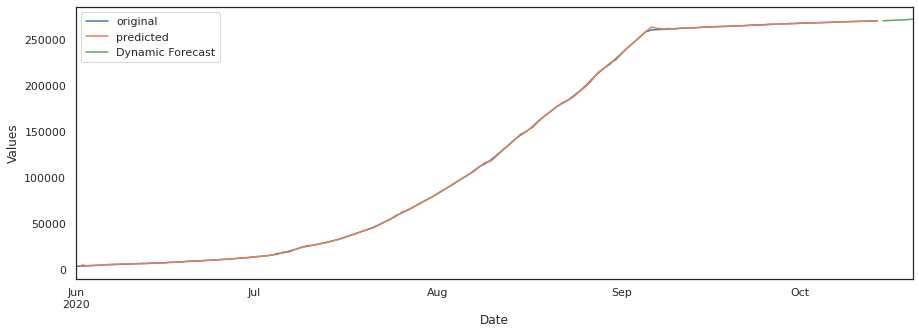

                             ARIMA Model Results                              
Dep. Variable:        D.Positive Case   No. Observations:                  135
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1040.009
Method:                           mle   S.D. of innovations            528.616
Date:                Sun, 20 Dec 2020   AIC                           2096.018
Time:                        05:16:10   BIC                           2119.260
Sample:                    06-02-2020   HQIC                          2105.462
                         - 10-14-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1466.5424   1119.094      1.310      0.192    -726.841    3659.926
ar.L1.D.Positive Case     0.1817      0.102      1.788      0.076      -0.017       0.381
ar.L2.D.

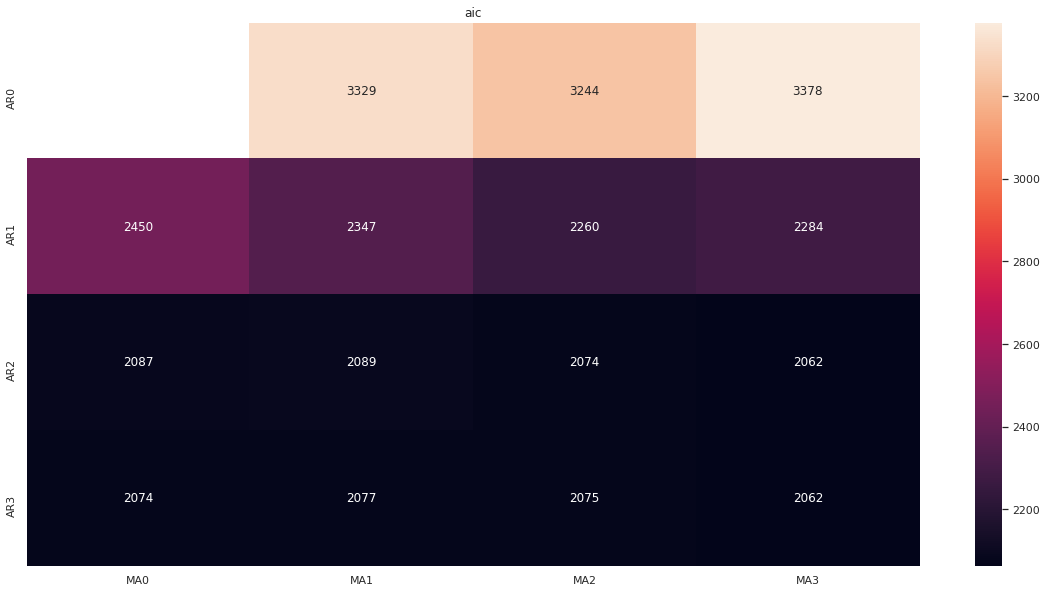

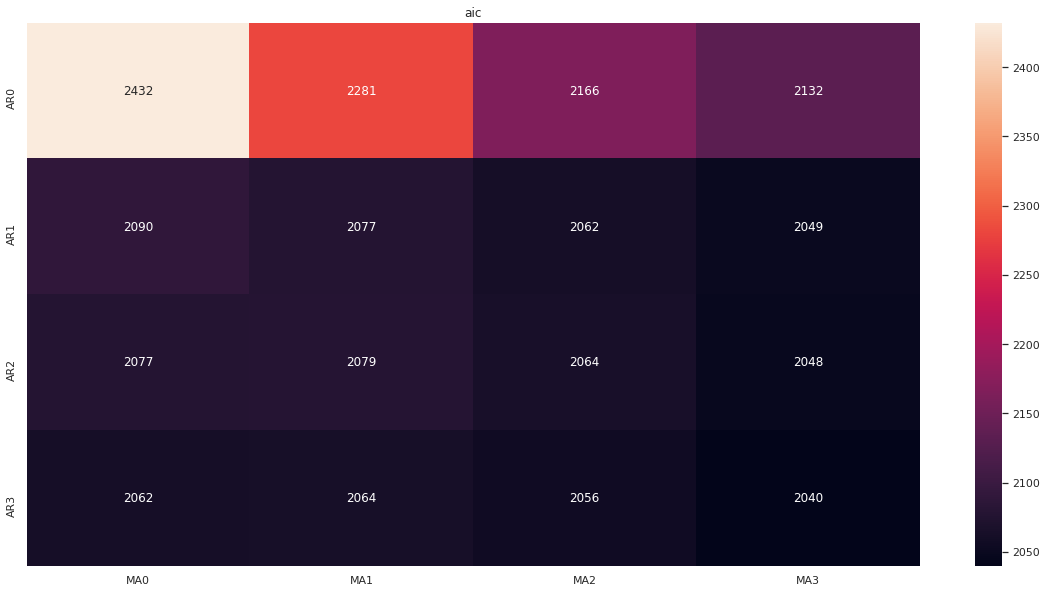

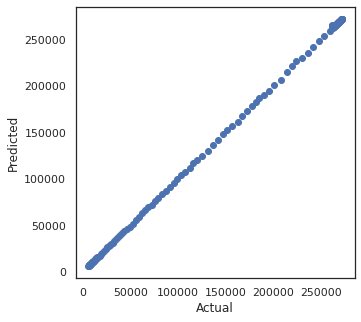

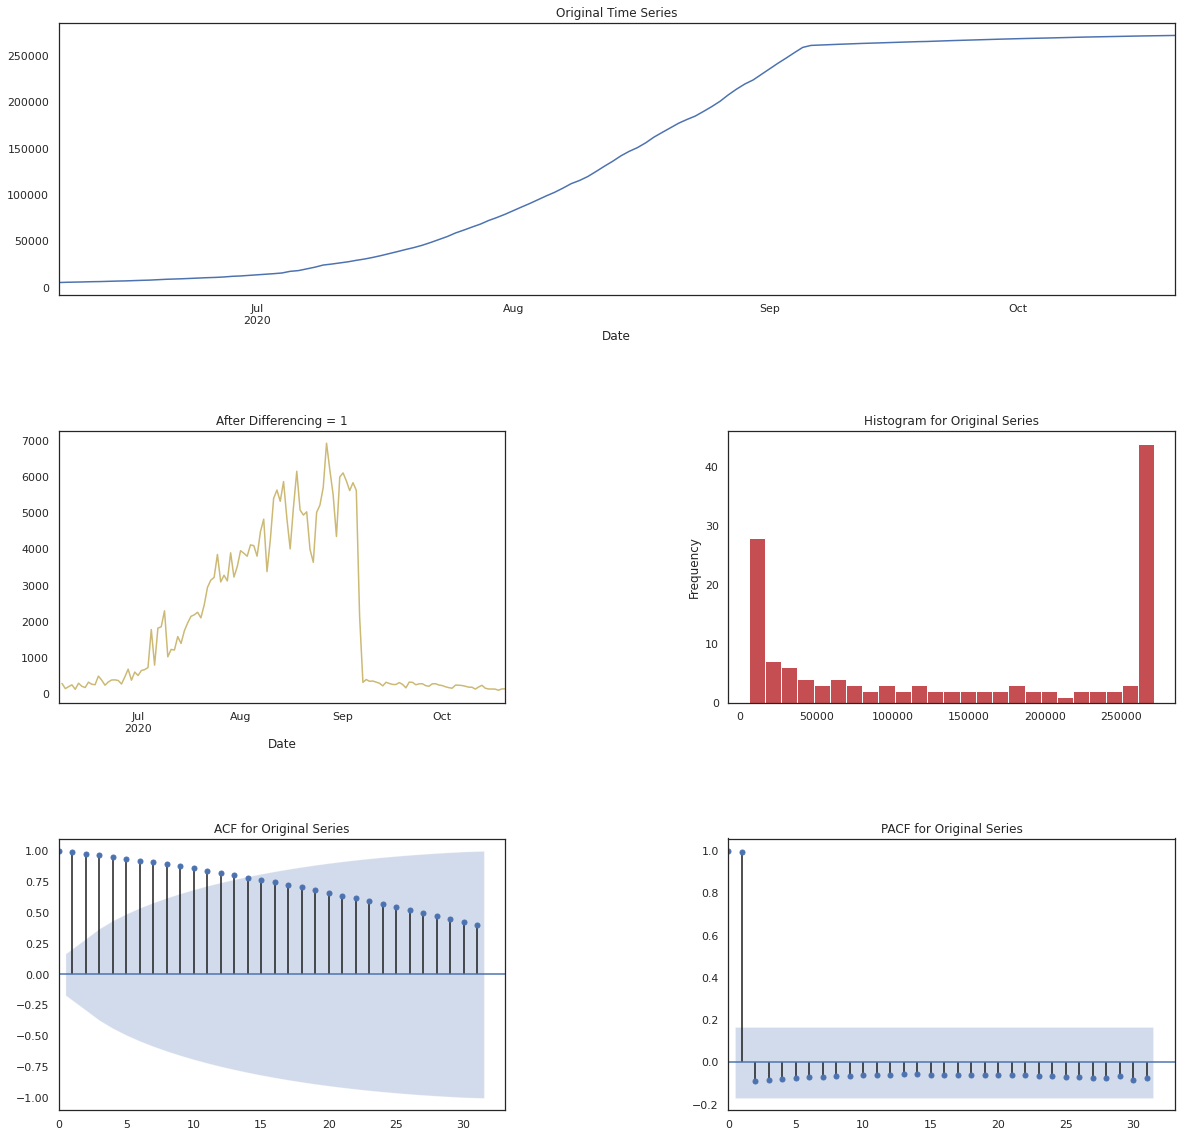


Best Model is:
    ML
    Best Model Forecasts: [271197.11010072 271341.53218326 271485.9037429  271631.17193114
 271747.36319144 271884.69678861]
    Best Model Score: 16.03


In [26]:
ml_dict = AT.Auto_Timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=6,
                            non_seasonal_pdq=None, seasonality=True,
                            seasonal_PDQ=None, model_type='best',
                            verbose=1)